In [1]:
import numpy as np
from astropy.table import Table, Column, unique
from astropy import units as u
from astropy.coordinates import SkyCoord
from catalog_cross_matcher import catalog_cross_matcher
from astropy.io import fits, ascii
from astropy.wcs import WCS
import matplotlib.pyplot as pl
from astropy.visualization import simple_norm
from astroquery.vizier import Vizier

In [173]:
k = fits.getdata('/orange/adamginsburg/w51/gtc/adendawson/real_reduction/reduced_images/good_wcs_k_mosaic.fits')
j = fits.getdata('/orange/adamginsburg/w51/gtc/adendawson/real_reduction/reduced_images/good_wcs_j_mosaic.fits')
h2 = fits.getdata('/orange/adamginsburg/w51/gtc/adendawson/real_reduction/reduced_images/good_wcs_h2_mosaic.fits')
h = fits.getdata('/orange/adamginsburg/w51/gtc/adendawson/real_reduction/reduced_images/good_wcs_h_mosaic.fits')

k_fh = fits.open('/orange/adamginsburg/w51/gtc/adendawson/real_reduction/reduced_images/good_wcs_k_mosaic.fits')
j_fh = fits.open('/orange/adamginsburg/w51/gtc/adendawson/real_reduction/reduced_images/good_wcs_j_mosaic.fits')
h_fh = fits.open('/orange/adamginsburg/w51/gtc/adendawson/real_reduction/reduced_images/good_wcs_h_mosaic.fits')
h2_fh = fits.open('/orange/adamginsburg/w51/gtc/adendawson/real_reduction/reduced_images/good_wcs_h2_mosaic.fits')

ww_k = WCS(k_fh[0].header)
ww_j = WCS(j_fh[0].header)
ww_h = WCS(h_fh[0].header)
ww_h2 = WCS(h2_fh[0].header)

In [2]:
gtc_cat = Table.read('final_final_gtc_catalog_revised_no_fgs_bsr.dat', format = 'ascii.basic')

# MS Reddening Zone 

In [8]:
ms_rz = Table.read('final_final_gtc_catalog_subsets/final_final_gtc_catalog_revised_no_fgs_bsr_redzone_subset.dat', format = 'ascii')

ms_rz_idx = np.array(ms_rz['col1'])

In [24]:
bil = Table.read('http://stev.oapd.inaf.it/tmp/output72861826819.dat', format = 'ascii')

In [120]:
iso_x_points = [-0.019, -0.02, -0.023, -0.026, -0.028, -0.029, -0.031, -0.033, -0.036, -0.04, -0.04, -0.044, -0.046, -0.048, -0.05, -0.053, -0.056, -0.06, -0.066, -0.072, -0.076, -0.078, -0.077, -0.077, -0.077, -0.08, -0.082, -0.08, -0.08, -0.08, -0.081, -0.082, -0.083, -0.084, -0.085, -0.084, -0.084, -0.084, -0.084, -0.084, -0.083, -0.083, -0.083, -0.081, -0.08, -0.079, -0.076, -0.074, -0.072, -0.07, -0.069, -0.068, -0.069, -0.074, -0.074, -0.073, -0.07, -0.073, -0.072, -0.068, -0.065, -0.062, -0.061, -0.06, -0.061, -0.055, -0.054, -0.051, -0.051, -0.047, -0.046, -0.044, -0.042, -0.04, -0.038, -0.035, -0.033, -0.032, -0.028, -0.027, -0.024, -0.022, -0.02, -0.014, 0.001, 0.012, 0.017, 0.03, 0.042, 0.046, 0.047, 0.051, 0.054, 0.058, 0.065, 0.069, 0.073, 0.077, 0.083, 0.091, 0.097, 0.106, 0.113, 0.124, 0.132, 0.165, 0.207, 0.218, 0.224, 0.228, 0.233, 0.237, 0.24, 0.246, 0.251, 0.259, 0.265, 0.272, 0.278, 0.289]#, 0.296]
iso_y_points = [6.51, 6.62, 6.71, 6.81, 6.90, 7.00, 7.10, 7.19, 7.29, 7.38, 7.48, 7.57, 7.67, 7.77, 7.86, 7.96, 8.06, 8.15, 8.24, 8.33, 8.43, 8.52, 8.63, 8.72, 8.82, 8.92, 9.02, 9.11, 9.22, 9.32, 9.42, 9.52, 9.61, 9.71, 9.81, 9.91, 10.01, 10.11, 10.21, 10.31, 10.41, 10.51, 10.61, 10.72, 10.82, 10.92, 11.02, 11.13, 11.23, 11.33, 11.43, 11.54, 11.64, 11.73, 11.83, 11.93, 12.03, 12.13, 12.23, 12.33, 12.44, 12.54, 12.64, 12.75, 12.85, 12.96, 13.06, 13.16, 13.27, 13.37, 13.47, 13.58, 13.68, 13.79, 13.89, 13.99, 14.10, 14.20, 14.30, 14.41, 14.51, 14.62, 14.71, 14.83, 14.95, 15.07, 15.18, 15.30, 15.42, 15.53, 15.64, 15.74, 15.85, 15.95, 16.07, 16.17, 16.27, 16.38, 16.49, 16.61, 16.72, 16.83, 16.94, 17.06, 17.17, 17.33, 17.50, 17.62, 17.73, 17.83, 17.94, 18.06, 18.15, 18.27, 18.37, 18.49, 18.60, 18.71, 18.82, 18.94]#, 19.05]

In [121]:
y_int = np.arange(6.5, 18.5, 0.1)
x_points = np.linspace(-0.5, 3, 1000)
y_points = [1.69 * x_points + i for i in y_int]

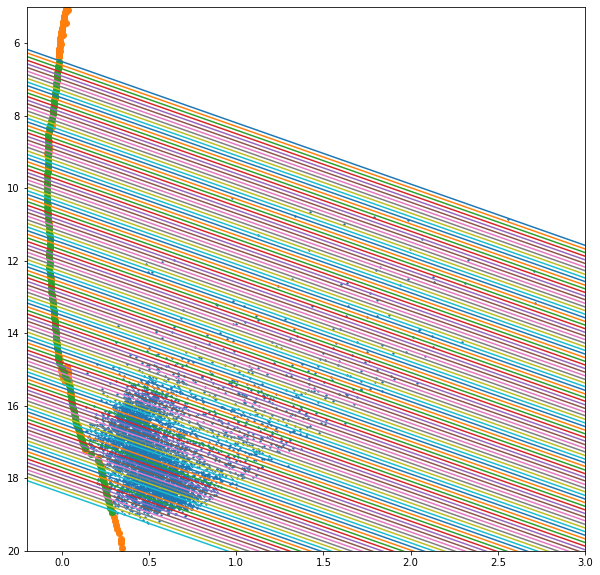

In [123]:
pl.figure(figsize = (10,10))
pl.scatter(gtc_cat[ms_rz_idx]['mag_h_cal'] - gtc_cat[ms_rz_idx]['mag_k_cal'], gtc_cat[ms_rz_idx]['mag_k_cal'], s = 2)
pl.scatter(bil['col30'] - bil['col31'], bil['col31'] + 13.5)
pl.scatter(iso_x_points, iso_y_points)
for i in range(len(y_points)):
    pl.plot(x_points, y_points[i])
pl.xlim(-0.2, 3); pl.ylim(5, 20)
pl.gca().invert_yaxis()

In [36]:
hmk = np.array(gtc_cat['mag_h_cal'] - gtc_cat['mag_k_cal'])
jmh = np.array(gtc_cat['mag_j_cal'] - gtc_cat['mag_h_cal'])

gtc_cat.add_columns([jmh, hmk], names = ['J-H', 'H-K'])

In [76]:
def slice_checker(x_vals, y_vals, y_int):
    sol = 1.69 * x_vals - y_vals
    
    idx = []
    for i in range(len(sol)):
        if sol[i] < y_int and sol[i] > (y_int - 0.1):
            idx.append(i)
            
    return idx

In [84]:
rz_cat = gtc_cat[ms_rz_idx].copy()

In [124]:
x_vals = np.array(rz_cat['H-K'])
y_vals = np.array(rz_cat['mag_k_cal'])
idx = [slice_checker(x_vals, y_vals, -y_int[i]) for i in range(len(y_int))]

In [125]:
a_v = 5
a_k = a_v * 0.112
a_h = a_k * 1.56
a_j = a_k * 2.51

J = 13
H = 12
K = 11

HK = (H + a_h) - (K + a_k)
JK = (J + a_j) - (K + a_k)
JH = (J + a_j) - (H + a_h)

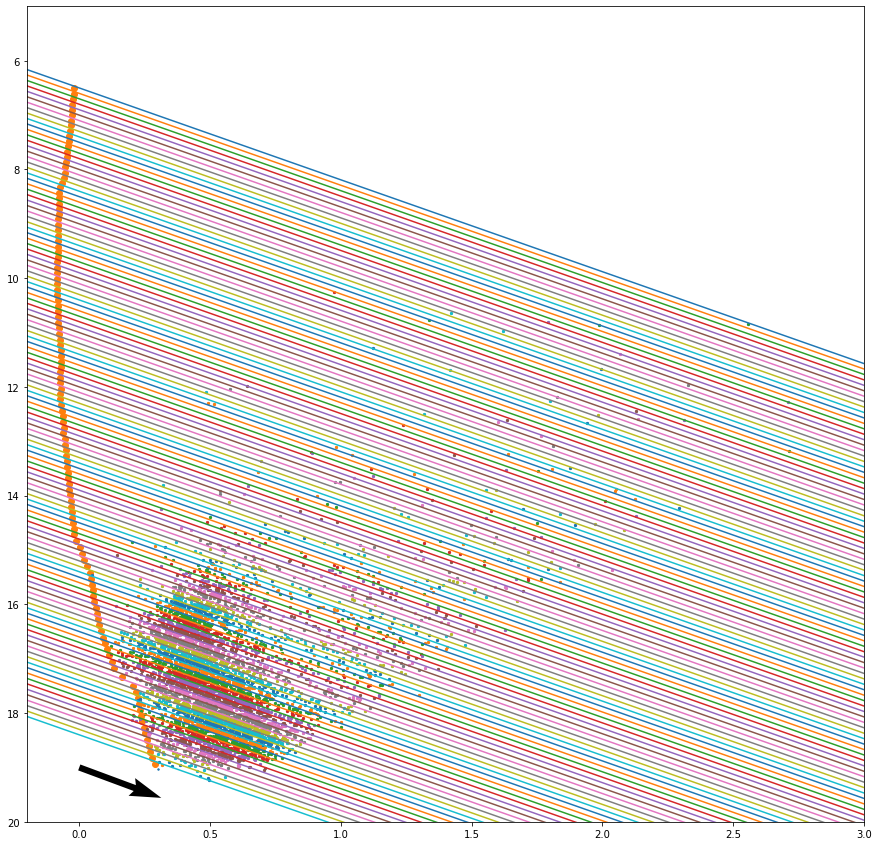

In [126]:
vec = np.array([0.0, 19, HK - 1, a_k])
X, Y, U, V = vec

pl.figure(figsize = (15,15))
pl.scatter(gtc_cat[ms_rz_idx]['mag_h_cal'] - gtc_cat[ms_rz_idx]['mag_k_cal'], gtc_cat[ms_rz_idx]['mag_k_cal'], s = 2)
pl.scatter(iso_x_points, iso_y_points)
for i in range(len(idx)):
    pl.scatter(rz_cat[idx[i]]['mag_h_cal'] - rz_cat[idx[i]]['mag_k_cal'], rz_cat[idx[i]]['mag_k_cal'], s = 5)
for i in range(len(y_points)):
    pl.plot(x_points, y_points[i])
pl.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale = 1)
pl.xlim(-0.2, 3); pl.ylim(5, 20)
pl.gca().invert_yaxis()

In [127]:
cmd_distance = np.sqrt((0.3135 - 0.0)**2 + (19.5595 - 19)**2)

In [132]:
distance = [np.sqrt((np.array(rz_cat[idx[i]]['H-K']) - iso_x_points[i])**2 + (np.array(rz_cat[idx[i]]['mag_k_cal']) - iso_y_points[i])) for i in range(len(idx))]

<ipython-input-132-86085c2a6157>:1: RuntimeWarning: invalid value encountered in sqrt
  distance = [np.sqrt((np.array(rz_cat[idx[i]]['H-K']) - iso_x_points[i])**2 + (np.array(rz_cat[idx[i]]['mag_k_cal']) - iso_y_points[i])) for i in range(len(idx))]


In [142]:
av_list = (distance / cmd_distance) * 5

<ipython-input-142-ddb8399a8d8e>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  av_list = (distance / cmd_distance) * 5


In [202]:
av = np.empty(len(rz_cat))
for i in range(len(idx)):
    av[idx[i]] = av_list[i]

In [207]:
rz_cat.add_column(av, name = 'av')

In [209]:
rz_idx = np.array(rz_cat['index'])

In [210]:
av_all = np.empty(len(gtc_cat))
av_all[:] = np.nan

In [211]:
av_all[rz_idx] = np.array(rz_cat['av'])

# CTTS Reddening Zone

In [233]:
ctts_zone = Table.read('final_final_gtc_catalog_subsets/final_final_gtc_catalog_revised_no_fgs_bsr_ctts_subset.dat', format = 'ascii')

In [235]:
class2 = gtc_cat['Class'] == 2.0
saral_match = gtc_cat['saral_match_separation'] < 0.3
xray = gtc_cat['xray_match_separation'] < 0.4

In [237]:
ctts_idx = np.array(ctts_zone['col1'])
class2_idx = np.array(gtc_cat[class2 & saral_match]['index'])
xray_idx = np.array(gtc_cat[xray]['index'])

In [240]:
new_ctts_idx = np.unique(np.concatenate((ctts_idx, class2_idx, xray_idx)))

In [253]:
ctts_x_points = np.arange(0.03292, 1.0115, 0.0089)
ctts_y_points = [0.566 * i + 0.532 for i in ctts_x_points]

In [293]:
y_int = np.arange(-0.6, 0.51, 0.01)
x_points = np.linspace(-5, 7, 10000)
y_points = [1.69 * x_points + i for i in y_int]

(0.4, 1.5)

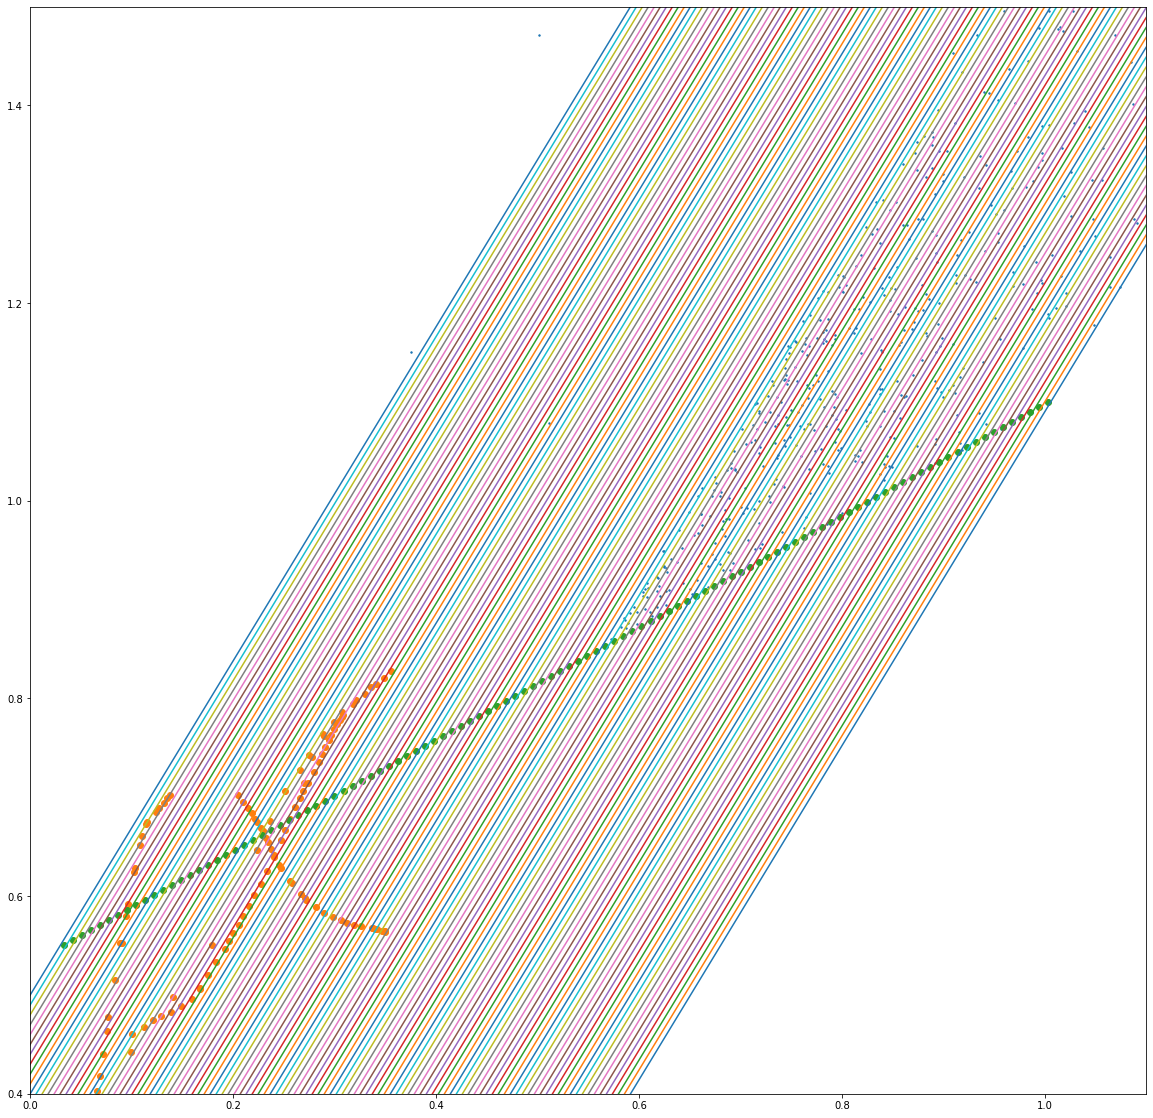

In [294]:
pl.figure(figsize = (20,20))
pl.scatter(gtc_cat[new_ctts_idx]['mag_h_cal'] - gtc_cat[new_ctts_idx]['mag_k_cal'], gtc_cat[new_ctts_idx]['mag_j_cal'] - gtc_cat[new_ctts_idx]['mag_h_cal'], s = 2)
pl.scatter(bil['col30'] - bil['col31'], bil['col29'] - bil['col30'])
pl.scatter(ctts_x_points, ctts_y_points)
for i in range(len(y_points)):
    pl.plot(x_points, y_points[i])
pl.xlim(0.0, 1.1); pl.ylim(0.4, 1.5)
#pl.gca().invert_yaxis()

In [295]:
def slice_checker(x_vals, y_vals, y_int):
    sol = 1.69 * x_vals - y_vals
    
    idx = []
    for i in range(len(sol)):
        if sol[i] > y_int and sol[i] < (y_int + 0.01):
            idx.append(i)
            
    return idx

In [296]:
ctts_cat = gtc_cat[new_ctts_idx].copy()

In [320]:
x_vals = np.array(ctts_cat['H-K'])
y_vals = np.array(ctts_cat['J-H'])
idx = [slice_checker(x_vals, y_vals, -y_int[i]) for i in range(len(y_int))]
idx.pop(110)

[]

(0.8, 1.5)

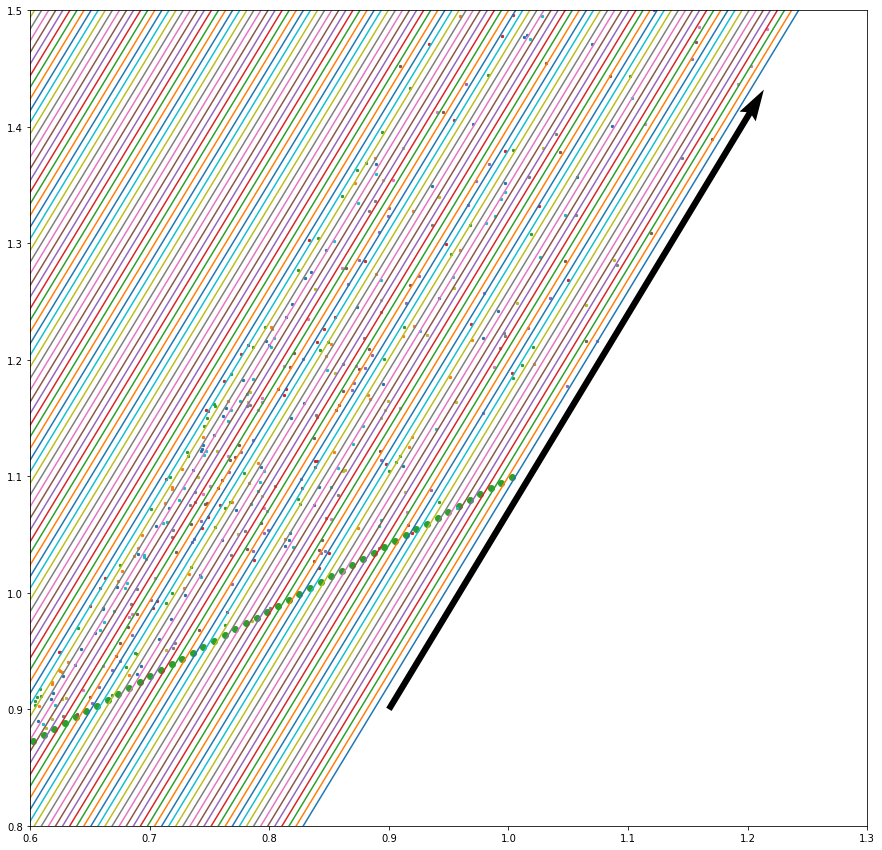

In [321]:
vec = np.array([0.9, 0.9, HK - 1, JH - 1])
X, Y, U, V = vec

pl.figure(figsize = (15,15))
pl.scatter(gtc_cat[new_ctts_idx]['mag_h_cal'] - gtc_cat[new_ctts_idx]['mag_k_cal'], gtc_cat[new_ctts_idx]['mag_j_cal'] - gtc_cat[new_ctts_idx]['mag_h_cal'], s = 2)
pl.scatter(bil['col30'] - bil['col31'], bil['col29'] - bil['col30'])
pl.scatter(ctts_x_points, ctts_y_points)
for i in range(len(idx)):
    pl.scatter(ctts_cat[idx[i]]['mag_h_cal'] - ctts_cat[idx[i]]['mag_k_cal'], ctts_cat[idx[i]]['mag_j_cal'] - ctts_cat[idx[i]]['mag_h_cal'], s = 5)
for i in range(len(y_points)):
    pl.plot(x_points, y_points[i])
pl.quiver(X, Y, U, V, angles='xy', scale_units='xy', scale = 1)
pl.xlim(0.6, 1.3); pl.ylim(0.8, 1.5)

In [322]:
ccd_distance = np.sqrt((1.2136 - 0.9)**2 + (1.432 - 0.9)**2)

In [326]:
distance = [np.sqrt((np.array(ctts_cat[idx[i]]['H-K']) - ctts_x_points[i])**2 + (np.array(ctts_cat[idx[i]]['J-H']) - ctts_y_points[i])) for i in range(len(idx))]

In [327]:
av_list = (distance / ccd_distance) * 5

<ipython-input-327-8dc9f4b7d586>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  av_list = (distance / ccd_distance) * 5


In [329]:
av = np.empty(len(ctts_cat))
for i in range(len(idx)):
    av[idx[i]] = av_list[i]

In [332]:
ctts_cat.add_column(av, name = 'av')

In [333]:
ctts_idx = np.array(ctts_cat['index'])

In [334]:
av_all[ctts_idx] = np.array(ctts_cat['av'])

# Herbig Stars